In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
CM_full = torch.load('../cache/cinic-10-imagenet/vgg16_bn-12/CM_k.pt')
CM_med = torch.load('../cache/cinic-10-imagenet-medium/vgg16_bn-12/CM_k.pt')
CM_dummy = torch.load('../cache/cinic-10-imagenet-dummy/vgg16_bn-12/CM_k.pt')

def get_stats(arr):
    print("Min: {}".format(torch.min(arr)))
    print("Max: {}".format(torch.max(arr)))
    print("Mean: {} STD: {}".format(torch.mean(arr), torch.std(arr)))
    min_range = 0
    max_range = 5e-4
    print("Num ones: {}".format(torch.sum(torch.where(arr >= 1, 1, 0))))
    print(torch.sum(torch.logical_or(torch.where(arr > max_range, 1, 0), torch.where(arr < min_range, 1, 0))))
    print(512*512)
    print(torch.sum(torch.logical_or(torch.where(arr > max_range, 1, 0), torch.where(arr < min_range, 1, 0))) / torch.numel(arr))
    return np.histogram(arr.cpu().numpy(), bins=50, range=(min_range, max_range))



Full stats:
Min: 2.6991506274498533e-06
Max: 0.0051187751814723015
Mean: 0.0001416267332388088 STD: 0.00013781894813291728
Num ones: 0
tensor(6738, device='cuda:0')
262144
tensor(0.0257, device='cuda:0')


(0.0, 40.0)

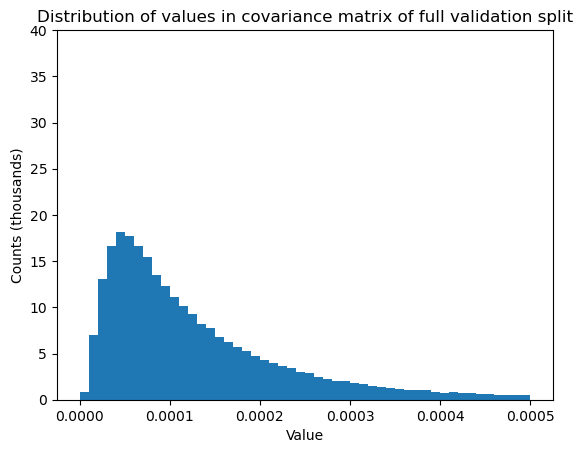

In [122]:
print("Full stats:")
counts, bins = get_stats(CM_full)
counts = counts / 1000
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Distribution of values in covariance matrix of full validation split")
plt.ylabel("Counts (thousands)")
plt.xlabel("Value")
plt.ylim([0, 40])


Medium stats:
Min: 2.7003566174244042e-06
Max: 0.005114050582051277
Mean: 0.00014167230983730406 STD: 0.0001378130546072498
Num ones: 0
tensor(6753, device='cuda:0')
262144
tensor(0.0258, device='cuda:0')


(0.0, 40.0)

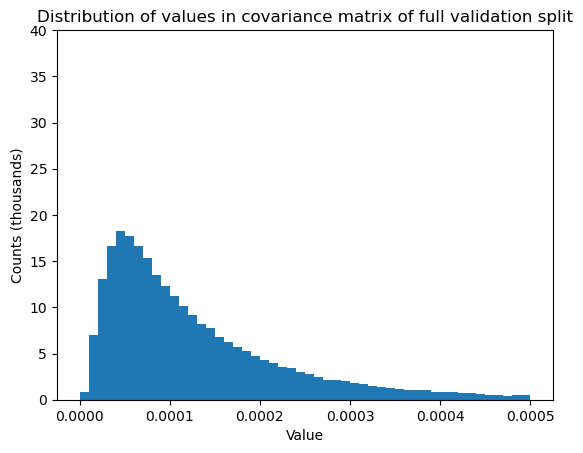

In [123]:
print("Medium stats:")
counts, bins = get_stats(CM_med)
counts = counts / 1000
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Distribution of values in covariance matrix of full validation split")
plt.ylabel("Counts (thousands)")
plt.xlabel("Value")
plt.ylim([0, 40])


Dummy stats:
Min: 1.5846050871459738e-07
Max: 1.0
Mean: 0.002008215058594942 STD: 0.044148653745651245
Num ones: 512
tensor(512, device='cuda:0')
262144
tensor(0.0020, device='cuda:0')
Min: 1.5846050871459738e-07
Max: 1.0
Mean: 0.002008215058594942 STD: 0.044148653745651245
Num ones: 512
tensor(512, device='cuda:0')
262144
tensor(0.0020, device='cuda:0')


(0.0, 40.0)

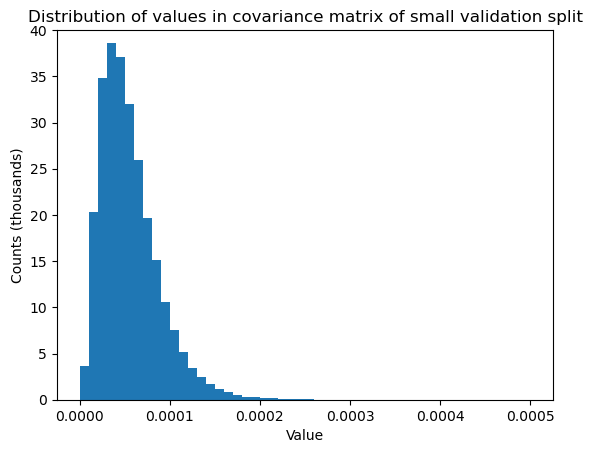

In [124]:
plt.clf()
print("Dummy stats:")
get_stats(CM_dummy)
counts, bins = get_stats(CM_dummy)
counts = counts / 1000
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Distribution of values in covariance matrix of small validation split")
plt.ylabel("Counts (thousands)")
plt.xlabel("Value")
plt.ylim([0, 40])